# Part A: Analyze the results of your checkpoint study

## Step 1A: Take Your Study and Analyze the Results

Get 2 "participants" to take your study and collect their data.  If you're working in a pair, you can take it once each.  If you're working alone, you can do twice yourself, or do it once and ask a friend to do it once.  

Download your data from qualtrics, and read it into this notebook to analyze it.  

You will want to keep track of the following (at minimum) for each trial:
- The time to complete the trial
- Whether the trial was correctly completed
- Which condition the trial belongs to
- Which participant the trial was completed by

## Step 2A: Display summary statistics for your trial data

1. Make a histogram of response times for each condition

2. Print the mean response time for each condition

3. Print the mean response time for each participant

4. Print the average number of correct responses for each condition

5. Print the average number of correct responses for each participant

In [1]:
from google.colab import files
uploaded = files.upload()

Saving project4data.csv to project4data.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('project4data.csv', skiprows=5)

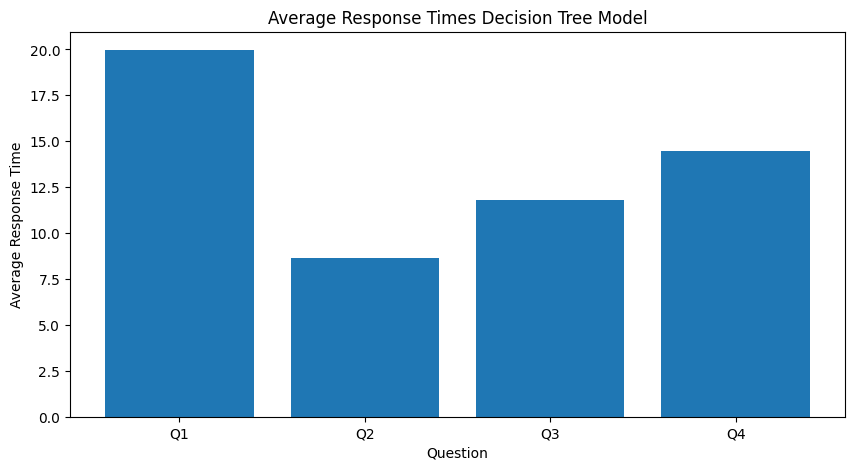

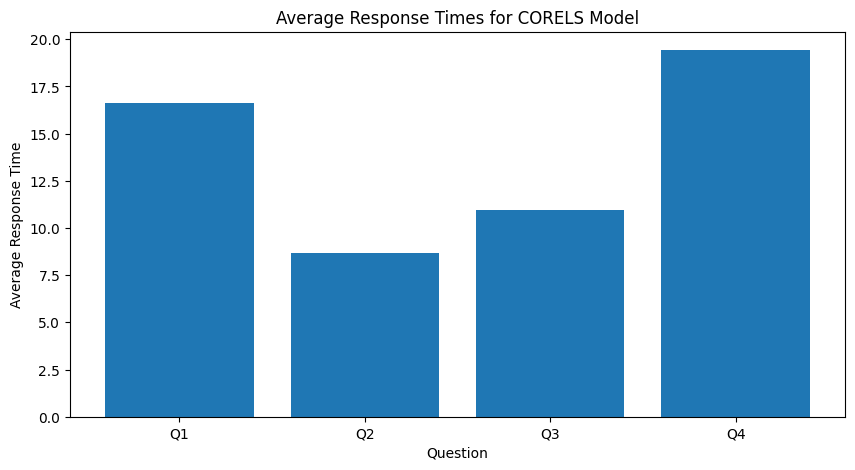

In [3]:
condition1_columns = [20, 25, 30, 35]
condition2_columns = [40, 45, 50, 55]

condition1_data = data.iloc[:, condition1_columns].apply(pd.to_numeric, errors='coerce')
condition2_data = data.iloc[:, condition2_columns].apply(pd.to_numeric, errors='coerce')

condition1_averages = condition1_data.mean()
condition2_averages = condition2_data.mean()

plt.figure(figsize=(10, 5))
plt.bar(range(len(condition1_averages)), condition1_averages, tick_label=['Q1', 'Q2', 'Q3', 'Q4'])
plt.title('Average Response Times Decision Tree Model')
plt.xlabel('Question')
plt.ylabel('Average Response Time')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(range(len(condition2_averages)), condition2_averages, tick_label=['Q1', 'Q2', 'Q3', 'Q4'])
plt.title('Average Response Times for CORELS Model')
plt.xlabel('Question')
plt.ylabel('Average Response Time')
plt.show()

In [4]:
condition1_mean = condition1_data.stack().mean()
condition2_mean = condition2_data.stack().mean()

print(f"Mean response time for Decision Tree Model: {condition1_mean:.2f}")
print(f"Mean response time for CORELS Model: {condition2_mean:.2f}")

Mean response time for Decision Tree Model: 13.73
Mean response time for CORELS Model: 13.91


In [5]:
condition1_data = data.iloc[:, condition1_columns].apply(pd.to_numeric, errors='coerce')
condition2_data = data.iloc[:, condition2_columns].apply(pd.to_numeric, errors='coerce')

mean_response_times = pd.DataFrame({
    'Participant': range(1, len(data) + 1),
    'Mean Response Time': (condition1_data.mean(axis=1) + condition2_data.mean(axis=1)) / 2
})

for idx, row in mean_response_times.iterrows():
    print(f"Participant {row['Participant']}: Mean Response Time = {row['Mean Response Time']:.2f}")

Participant 1.0: Mean Response Time = 10.95
Participant 2.0: Mean Response Time = 16.68


In [6]:
dt_answers = ["Positive (1)", "Negative (0)", "Negative (0)", "Positive (1)"]
corels_answers = [False, True, True, False]

dt_columns = [17, 22, 27, 32]
corels_columns = [37, 42, 47, 52]

dt_user_data = data.iloc[:, dt_columns]
corels_user_data = data.iloc[:, corels_columns].astype(bool)

dt_correct_counts = (dt_user_data.values == dt_answers).sum(axis=1)
corels_correct_counts = (corels_user_data.values == corels_answers).sum(axis=1)

dt_average_correct = dt_correct_counts.mean()
corels_average_correct = corels_correct_counts.mean()

print(f"Average number of correct responses for DT condition: {dt_average_correct:.2f} / 4")
print(f"Average number of correct responses for CORELS: {corels_average_correct:.2f} / 4")

Average number of correct responses for DT condition: 3.50 / 4
Average number of correct responses for CORELS: 4.00 / 4


In [7]:
participant_correct_counts = []

for i in range(len(data)):
    dt_correct = sum(dt_user_data.iloc[i].values == dt_answers)
    corels_correct = sum(corels_user_data.iloc[i].values == corels_answers)

    participant_correct_counts.append({
        'Participant': i + 1,
        'DT Correct Responses': dt_correct,
        'CORELS Correct Responses': corels_correct
    })

for participant in participant_correct_counts:
    print(f"Participant {participant['Participant']}: DT Correct Responses = {participant['DT Correct Responses']}, "
          f"CORELS Correct Responses = {participant['CORELS Correct Responses']}")

Participant 1: DT Correct Responses = 4, CORELS Correct Responses = 4
Participant 2: DT Correct Responses = 3, CORELS Correct Responses = 4


## Step 3A: Compute statistical tests

1. Compute an independent-samples t-test comparing the response times of the 2 conditions
2. Compute a paired-samples t-test comparing the response times of the 2 conditions

You are unlikely to see a statistical difference with the amount of data you have collected.

In [8]:
from scipy.stats import ttest_ind, ttest_rel

condition1_flat = condition1_data.values.flatten()
condition2_flat = condition2_data.values.flatten()

condition1_flat = condition1_flat[~pd.isna(condition1_flat)]
condition2_flat = condition2_flat[~pd.isna(condition2_flat)]

t_stat_ind, p_val_ind = ttest_ind(condition1_flat, condition2_flat, equal_var=False)
print(f"Independent-samples t-test: t-statistic = {t_stat_ind:.2f}, p-value = {p_val_ind:.4f}")

condition1_means = condition1_data.mean(axis=1)
condition2_means = condition2_data.mean(axis=1)

t_stat_paired, p_val_paired = ttest_rel(condition1_means, condition2_means)
print(f"Paired-samples t-test: t-statistic = {t_stat_paired:.2f}, p-value = {p_val_paired:.4f}")

Independent-samples t-test: t-statistic = -0.06, p-value = 0.9499
Paired-samples t-test: t-statistic = -0.26, p-value = 0.8365


## Step 4A: Take the study again to test your survey and analysis code

**This is not a way to get research results, but it's a useful test that your survey and analysis are working correctly!**

Take the survey again twice and deliberately wait an extra 20 seconds when completing each decision tree trial before moving to the next trial.  Repeat analysis steps 1A-3A with the data from these 2 responses.  You should now see a statistical difference between the 2 conditions.

Note, we're doing the test of your implementation second with the hopes that you might be "fresher" for the first analysis.  (In practice, you wouldn't take your own survey for real data collection because you've already seen all of the inputs and understand the experimental manipulation, among other reasons!)

In [9]:
from google.colab import files
uploaded = files.upload()

Saving project4datastep4.csv to project4datastep4.csv


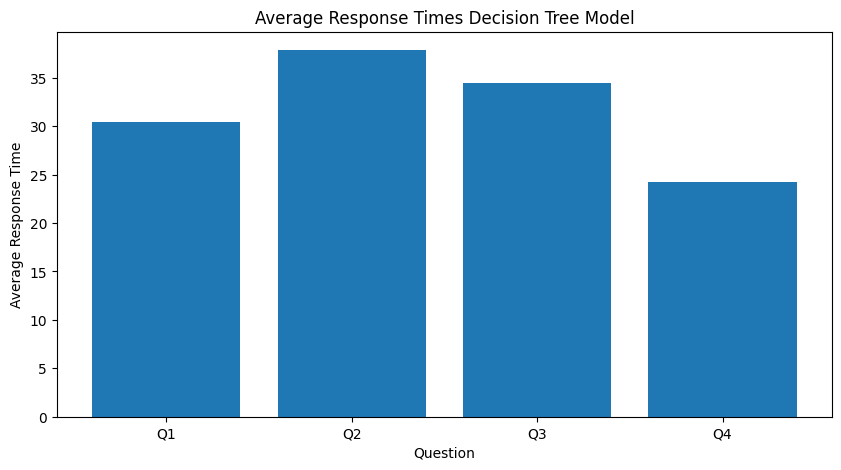

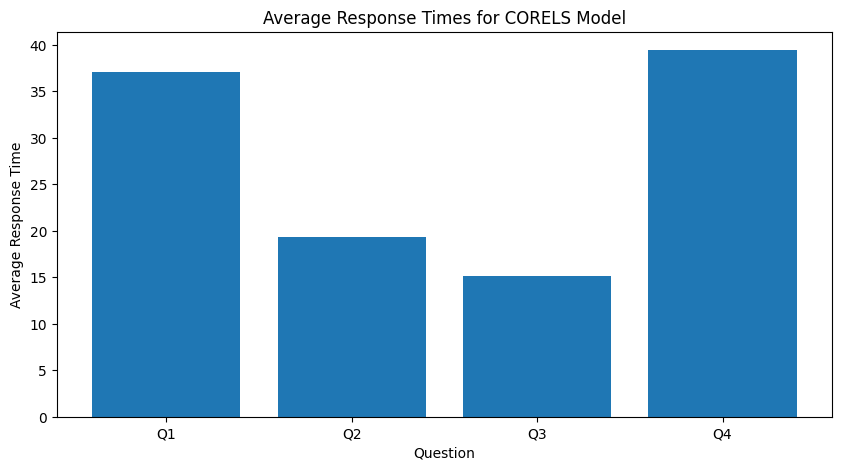

In [10]:
data = pd.read_csv('project4datastep4.csv', skiprows=5)

condition1_data = data.iloc[:, condition1_columns].apply(pd.to_numeric, errors='coerce')
condition2_data = data.iloc[:, condition2_columns].apply(pd.to_numeric, errors='coerce')

condition1_averages = condition1_data.mean()
condition2_averages = condition2_data.mean()

plt.figure(figsize=(10, 5))
plt.bar(range(len(condition1_averages)), condition1_averages, tick_label=['Q1', 'Q2', 'Q3', 'Q4'])
plt.title('Average Response Times Decision Tree Model')
plt.xlabel('Question')
plt.ylabel('Average Response Time')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(range(len(condition2_averages)), condition2_averages, tick_label=['Q1', 'Q2', 'Q3', 'Q4'])
plt.title('Average Response Times for CORELS Model')
plt.xlabel('Question')
plt.ylabel('Average Response Time')
plt.show()

In [11]:
condition1_mean = condition1_data.stack().mean()
condition2_mean = condition2_data.stack().mean()

print(f"Mean response time for Decision Tree Model: {condition1_mean:.2f}")
print(f"Mean response time for CORELS Model: {condition2_mean:.2f}")

Mean response time for Decision Tree Model: 31.74
Mean response time for CORELS Model: 27.74


In [12]:
condition1_data = data.iloc[:, condition1_columns].apply(pd.to_numeric, errors='coerce')
condition2_data = data.iloc[:, condition2_columns].apply(pd.to_numeric, errors='coerce')

all_conditions_data = pd.concat([condition1_data, condition2_data], axis=1)

mean_response_times = all_conditions_data.mean(axis=1)

for idx, mean_time in enumerate(mean_response_times, start=1):
    print(f"Participant {idx}: Mean Response Time = {mean_time:.2f}")

Participant 1: Mean Response Time = 10.95
Participant 2: Mean Response Time = 16.68
Participant 3: Mean Response Time = 43.27
Participant 4: Mean Response Time = 48.05


In [13]:
dt_answers = ["Positive (1)", "Negative (0)", "Negative (0)", "Positive (1)"]
corels_answers = [False, True, True, False]

dt_columns = [17, 22, 27, 32]
corels_columns = [37, 42, 47, 52]

dt_user_data = data.iloc[:, dt_columns]
corels_user_data = data.iloc[:, corels_columns].astype(bool)

dt_correct_counts = (dt_user_data.values == dt_answers).sum(axis=1)
corels_correct_counts = (corels_user_data.values == corels_answers).sum(axis=1)

dt_average_correct = dt_correct_counts.mean()
corels_average_correct = corels_correct_counts.mean()

print(f"Average number of correct responses for DT condition: {dt_average_correct:.2f} / 4")
print(f"Average number of correct responses for CORELS: {corels_average_correct:.2f} / 4")

Average number of correct responses for DT condition: 3.75 / 4
Average number of correct responses for CORELS: 4.00 / 4


In [14]:
participant_correct_counts = []

for i in range(len(data)):
    dt_correct = sum(dt_user_data.iloc[i].values == dt_answers)
    corels_correct = sum(corels_user_data.iloc[i].values == corels_answers)

    participant_correct_counts.append({
        'Participant': i + 1,
        'DT Correct Responses': dt_correct,
        'CORELS Correct Responses': corels_correct
    })

for participant in participant_correct_counts:
    print(f"Participant {participant['Participant']}: DT Correct Responses = {participant['DT Correct Responses']}, "
          f"CORELS Correct Responses = {participant['CORELS Correct Responses']}")

Participant 1: DT Correct Responses = 4, CORELS Correct Responses = 4
Participant 2: DT Correct Responses = 3, CORELS Correct Responses = 4
Participant 3: DT Correct Responses = 4, CORELS Correct Responses = 4
Participant 4: DT Correct Responses = 4, CORELS Correct Responses = 4


In [15]:
from scipy.stats import ttest_ind, ttest_rel

condition1_flat = condition1_data.values.flatten()
condition2_flat = condition2_data.values.flatten()

condition1_flat = condition1_flat[~pd.isna(condition1_flat)]
condition2_flat = condition2_flat[~pd.isna(condition2_flat)]

t_stat_ind, p_val_ind = ttest_ind(condition1_flat, condition2_flat, equal_var=False)
print(f"Independent-samples t-test: t-statistic = {t_stat_ind:.2f}, p-value = {p_val_ind:.4f}")

condition1_means = condition1_data.mean(axis=1)
condition2_means = condition2_data.mean(axis=1)

t_stat_paired, p_val_paired = ttest_rel(condition1_means, condition2_means)
print(f"Paired-samples t-test: t-statistic = {t_stat_paired:.2f}, p-value = {p_val_paired:.4f}")

Independent-samples t-test: t-statistic = 0.52, p-value = 0.6076
Paired-samples t-test: t-statistic = 1.62, p-value = 0.2036


### Writing prompt 1: Model comparison

Based on your study results, which of the 2 models is more interpretable?  (1-3 sentences).  

We believe decision tree model is more interpretable because the mean response time is shorter for the decision tree questions compared to the corels model. Although the CORELS model achieved shorter response times for 2/4 questions, the average time for the decision tree was shorter, so it may be a bit more interpretable (but obviously the sample size is too small to actually conclude anything).

### Writing prompt 2: Study limitations

What limitations of your study would you change to make your results more valid and generalizable?  Please list at least 2 limitations and describe why they are limitations (1-2 sentences each).   

First, we need more data, so we need more people to take out study. We can't make conclusions with just two data entries, and especially can't make conclusions with the study makers taking the study because we have worked with the data and questions, so we have seen them before. The thing about timing is that its variable, so the more data entries we have, the more conclusive it becomes and trends are easier to see.

Secondly, we think it would be valuable to have more instances, so we can have more questions to ask for every person taking the study. With only 8 questions total, we don't believe there is a high likelihood that those 8 questions will not always show the interpretibility of each model. Specifically, some instances may be really easy to determine on one model but not the other, but that does not necesarily mean one is less interpretible than the other.

# Part B: Designing Your Own Study

In the study_inputs zip folder, you will find 6 decision set models corresponding to 3 different conditions.  Each model is a decision set, which is very similar to a rule list.  Please read the study_input_instructions.pdf in the study_inputs folder to better understand how these models can be used to make predictions.  

Your goal in this part of the project is to design an interpretability experiment around these inputs, and to implement it as a Qualtrics study.  Your study should use a simulation task--i.e. asking participants to determine the prediction made by the model on a specified instance.  You do not need to collect and analyze data for this, but you will implement your study in qualtrics, and describe your design choices in a written report.  **You can find a study design template document in the assignment with an outline based on the requirements listed below.**

### Step 1B: Define your research question
Frame your study around a specific research question and articulate it clearly in the Research Question section of your report.  This should be 1-2 paragraphs and should describe the high-level goal of your study.   

### Step 2B: Make your design choices:
Make and justify the following design choices in the Design Choices section of your report.  Each design choice should be approximately a paragraph and should clearly describe what the design choice is, why you made it, and how it contributes to answering your research question.

1. **What primary metric do you plan to analyze for your study?**  You do not need to collect data and analyze data using this survey, but you should implement the survey in such a way that you could collect the necessary data to analyze your metric.  For example, if you plan to analyze response time, I expect to see your study collecting response time for each trial.  Other metrics you may consider include how accurately participants can determine the prediction made by the model, and user satisfaction with the explanation.  Please include a screenshot of one of your trials in this section to show how you will collect the data needed to compute your metric.

2. **Which instances will you use in your trials?**  You should hand-select instances by generating a specific set of feature values.  Use each instance in a Qualtrics trial for a different model (6 total).  You should describe the considerations you made when generating these instances.  For example, consider how we carefully chose instances in the checkpoint notebook by balancing the number of positive and negative predictions, and making sure that they had a statistically decision average path length.  Make sure to justify these considerations.  Please include screenshots of at least 2 trials and use them  describe the key considerations for the instances.

3. **Will your study be a within-subjects or a between-subject study?**  I.e. will every participant complete all 3 conditions, two conditions, or just one condition?  Why did you make that choice?  Consider tradeoffs such as the total amount of participants needed, the length of the study, whether participants will get tired or learn to do the task too well over multiple conditions.

4. **How will you handle randomizing your trials?** Will you do block-randomization all of the trials for each condition are contiguous, but the order of trials differs?  Will you fully randomize the order of the 6 trials?  Will you do no randomization at all?  Consider tradeoffs such as whether

### Step 3B: Make your design choices: Implement your study
Implement your study in Qualtrics.  A complete implementation will have 6 trials, each with one of the 6 provided models and an instance generated by you.  The study implementation should correspond to the design choices you listed above.  For example, if you say half of your instances are positive and half are negative, that should be true in your study.  If you say that you will measure user satisfaction as your primary metric, you should include a question asking about user satisfaction for each trial.

**Include the study link here:** https://colby.co1.qualtrics.com/jfe/form/SV_3W3lzrlNyJpALNc


# Extension Ideas

1. Collect and analyze data from one of your studies at scale (at least 10 people).  This includes either written or verbal instructions to brief your participants, and it should include improving the model visualizations.  For example, you can improve the decision tree visualization by re-creating the same logic in a google slide and including that in your study.

2. Design an alternate task that isn't the simulation task we have been working with.  This should include implementing at least 1 qualtrics trial that demos it (please include a screenshot) and a answering the questions from the report in the context of this new task.

3. Take steps to implement an interpretability user study comparing models we have previously studied.  For example, how does a Neural Network explained with LIME compare to a GAM when asking people to collaboratively make decisions with a machine learning model?  

## Extension 1

In this extension, we were able to find 10 Computer Science students to fill out our survey. We also improved the visalization of the CORELS rule list and DTC decision tree. For the rule list, we used Python syntax to make it more interpretable and more color-friendly, while also changing from 1-indexing to 0-indexing to correspond with the decision tree. For the decision tree, we took out all the unnecessary information for the user, and we only kept the name of the feature. To move along the tree, the user turns right if that feature is positive and to the left if that feature is negative. The improved visualizations used in our survey can be seen below:

Here is the link to the survey with the updated models: https://colby.co1.qualtrics.com/jfe/form/SV_3r3tvqd2dDsMXsy

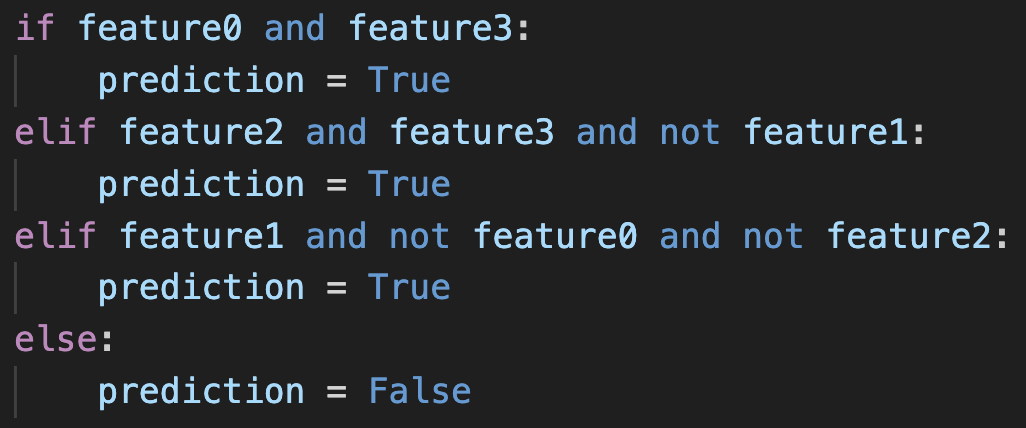

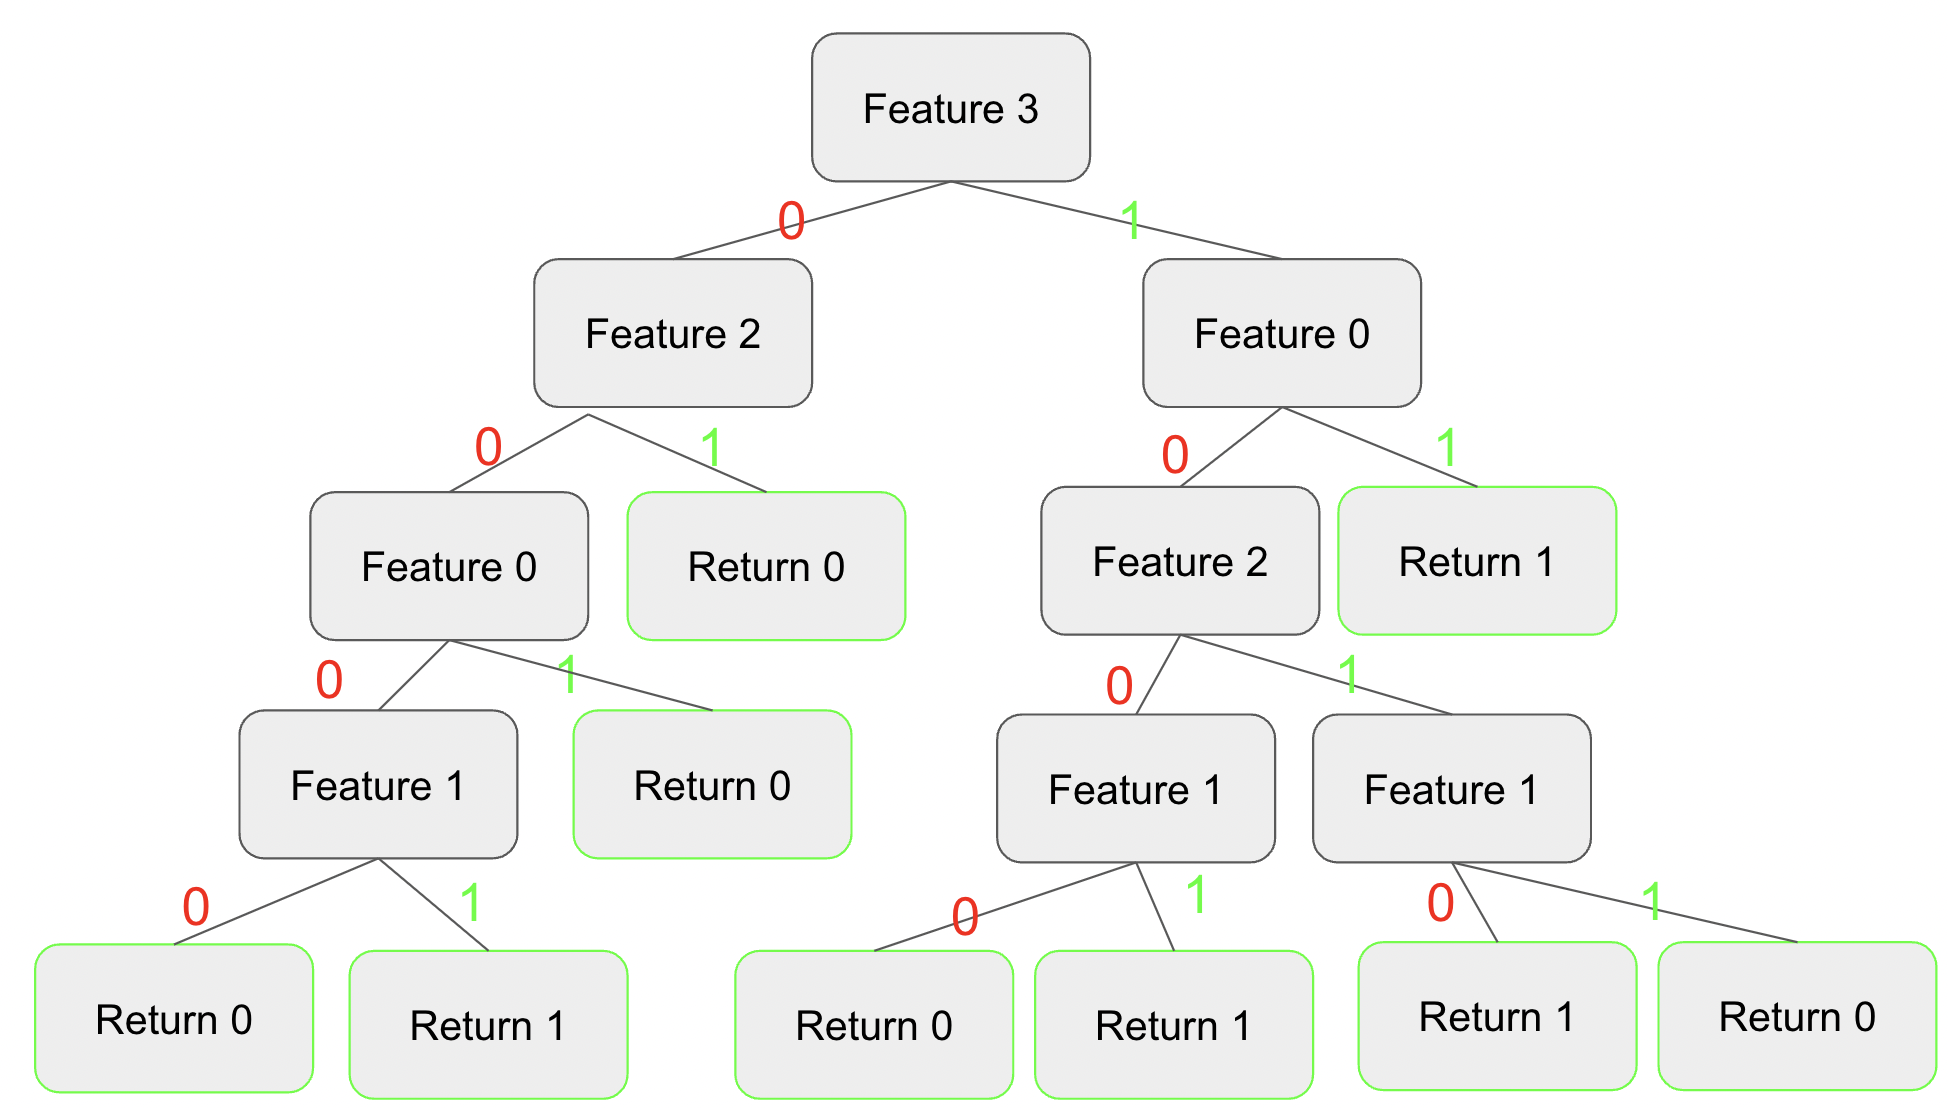




In [16]:
from google.colab import files
uploaded = files.upload()

Saving p4_extension_data.csv to p4_extension_data.csv


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('p4_extension_data.csv', skiprows=2)

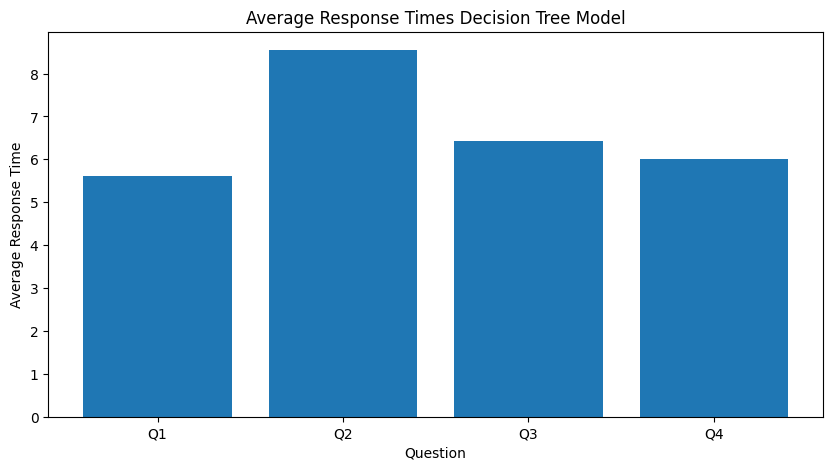

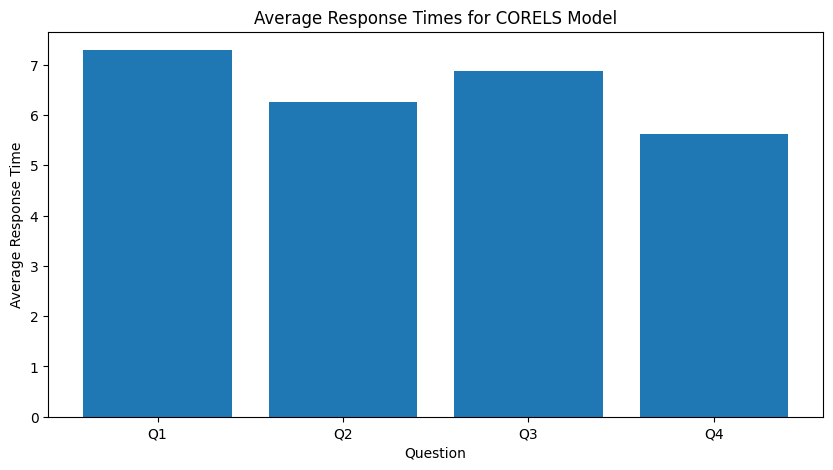

In [18]:
condition1_columns = [20, 25, 30, 35]
condition2_columns = [40, 45, 50, 55]

condition1_data = data.iloc[:, condition1_columns].apply(pd.to_numeric, errors='coerce')
condition2_data = data.iloc[:, condition2_columns].apply(pd.to_numeric, errors='coerce')

condition1_averages = condition1_data.mean()
condition2_averages = condition2_data.mean()

plt.figure(figsize=(10, 5))
plt.bar(range(len(condition1_averages)), condition1_averages, tick_label=['Q1', 'Q2', 'Q3', 'Q4'])
plt.title('Average Response Times Decision Tree Model')
plt.xlabel('Question')
plt.ylabel('Average Response Time')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(range(len(condition2_averages)), condition2_averages, tick_label=['Q1', 'Q2', 'Q3', 'Q4'])
plt.title('Average Response Times for CORELS Model')
plt.xlabel('Question')
plt.ylabel('Average Response Time')
plt.show()

In [19]:
condition1_mean = condition1_data.stack().mean()
condition2_mean = condition2_data.stack().mean()

print(f"Mean response time for Decision Tree Model: {condition1_mean:.2f}")
print(f"Mean response time for CORELS Model: {condition2_mean:.2f}")

Mean response time for Decision Tree Model: 6.65
Mean response time for CORELS Model: 6.51


In [20]:
condition1_data = data.iloc[:, condition1_columns].apply(pd.to_numeric, errors='coerce')
condition2_data = data.iloc[:, condition2_columns].apply(pd.to_numeric, errors='coerce')

mean_response_times = pd.DataFrame({
    'Participant': range(1, len(data) + 1),
    'Mean Response Time': (condition1_data.mean(axis=1) + condition2_data.mean(axis=1)) / 2
})

for idx, row in mean_response_times.iterrows():
    print(f"Participant {row['Participant']}: Mean Response Time = {row['Mean Response Time']:.2f}")

Participant 1.0: Mean Response Time = 9.82
Participant 2.0: Mean Response Time = 4.96
Participant 3.0: Mean Response Time = 7.22
Participant 4.0: Mean Response Time = 6.77
Participant 5.0: Mean Response Time = 5.39
Participant 6.0: Mean Response Time = 5.84
Participant 7.0: Mean Response Time = 5.03
Participant 8.0: Mean Response Time = 7.40
Participant 9.0: Mean Response Time = 6.39
Participant 10.0: Mean Response Time = 6.97


In [21]:
dt_answers = ["Positive (1)", "Negative (0)", "Negative (0)", "Positive (1)"]
corels_answers = [False, True, True, False]

dt_columns = [17, 22, 27, 32]
corels_columns = [37, 42, 47, 52]

dt_user_data = data.iloc[:, dt_columns]
corels_user_data = data.iloc[:, corels_columns].astype(bool)

dt_correct_counts = (dt_user_data.values == dt_answers).sum(axis=1)
corels_correct_counts = (corels_user_data.values == corels_answers).sum(axis=1)

dt_average_correct = dt_correct_counts.mean()
corels_average_correct = corels_correct_counts.mean()

print(f"Average number of correct responses for DT condition: {dt_average_correct:.2f} / 4")
print(f"Average number of correct responses for CORELS: {corels_average_correct:.2f} / 4")

Average number of correct responses for DT condition: 4.00 / 4
Average number of correct responses for CORELS: 4.00 / 4


In [22]:
participant_correct_counts = []

for i in range(len(data)):
    dt_correct = sum(dt_user_data.iloc[i].values == dt_answers)
    corels_correct = sum(corels_user_data.iloc[i].values == corels_answers)

    participant_correct_counts.append({
        'Participant': i + 1,
        'DT Correct Responses': dt_correct,
        'CORELS Correct Responses': corels_correct
    })

for participant in participant_correct_counts:
    print(f"Participant {participant['Participant']}: DT Correct Responses = {participant['DT Correct Responses']}, "
          f"CORELS Correct Responses = {participant['CORELS Correct Responses']}")

Participant 1: DT Correct Responses = 4, CORELS Correct Responses = 4
Participant 2: DT Correct Responses = 4, CORELS Correct Responses = 4
Participant 3: DT Correct Responses = 4, CORELS Correct Responses = 4
Participant 4: DT Correct Responses = 4, CORELS Correct Responses = 4
Participant 5: DT Correct Responses = 4, CORELS Correct Responses = 4
Participant 6: DT Correct Responses = 4, CORELS Correct Responses = 4
Participant 7: DT Correct Responses = 4, CORELS Correct Responses = 4
Participant 8: DT Correct Responses = 4, CORELS Correct Responses = 4
Participant 9: DT Correct Responses = 4, CORELS Correct Responses = 4
Participant 10: DT Correct Responses = 4, CORELS Correct Responses = 4


In [23]:
condition1_flat = condition1_data.values.flatten()
condition2_flat = condition2_data.values.flatten()

condition1_flat = condition1_flat[~pd.isna(condition1_flat)]
condition2_flat = condition2_flat[~pd.isna(condition2_flat)]

t_stat_ind, p_val_ind = ttest_ind(condition1_flat, condition2_flat, equal_var=False)
print(f"Independent-samples t-test: t-statistic = {t_stat_ind:.2f}, p-value = {p_val_ind:.4f}")

condition1_means = condition1_data.mean(axis=1)
condition2_means = condition2_data.mean(axis=1)

t_stat_paired, p_val_paired = ttest_rel(condition1_means, condition2_means)
print(f"Paired-samples t-test: t-statistic = {t_stat_paired:.2f}, p-value = {p_val_paired:.4f}")

Independent-samples t-test: t-statistic = 0.19, p-value = 0.8473
Paired-samples t-test: t-statistic = 0.19, p-value = 0.8503


Based on the data above, as we can see, with the improvements in our decision tree and corels model visual design, the response time for users had drastic improvements. Also, there are less errors, in fact, no errors among the 10 participants. Although this is still a very small sample size, the improvements are evident.